In [55]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter
from tqdm import tqdm, trange
import numpy as np
import tikzplotlib
from mlxtend.evaluate import permutation_test

In [2]:
soc_freq_df = pd.read_csv("data/analysis_data/soc_frequency.csv", index_col=None)
emp_df = pd.read_csv("data/employment/emp.csv", index_col=None)

In [3]:
soc_freq_df

,soc_code,soc_name,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,11,Management,0.000416,4.412259e-04,5.852006e-04,4.091884e-04,5.436580e-04,0.000548,5.693715e-04,0.000561,...,0.000378,0.000436,0.000433,0.000387,0.000396,4.049724e-04,0.000385,0.000405,4.441448e-04,4.360381e-04
1,13,Business and Financial Operations,0.000054,4.611272e-05,3.741692e-05,5.316989e-05,4.016717e-05,0.000038,6.842440e-05,0.000046,...,0.000044,0.000050,0.000058,0.000052,0.000048,4.765027e-05,0.000048,0.000045,5.095036e-05,4.489468e-05
2,15,Computer and Mathematical,0.000000,9.707941e-07,9.977844e-07,9.846275e-07,1.401180e-06,0.000000,7.054062e-07,0.000001,...,0.000010,0.000004,0.000004,0.000005,0.000007,8.269345e-06,0.000008,0.000012,1.157883e-05,7.938617e-06
3,17,Architecture and Engineering,0.000016,3.203621e-05,2.644129e-05,3.052345e-05,2.241889e-05,0.000035,3.421220e-05,0.000045,...,0.000029,0.000023,0.000025,0.000021,0.000021,1.991580e-05,0.000022,0.000022,2.504551e-05,3.235740e-05
4,19,"Life, Physical, and Social Science",0.000048,3.349240e-05,1.845901e-05,3.495428e-05,3.129303e-05,0.000022,2.927436e-05,0.000036,...,0.000091,0.000086,0.000082,0.000065,0.000061,6.111648e-05,0.000067,0.000056,5.899090e-05,5.543633e-05
5,21,Community and Social Service,0.000173,2.246988e-04,1.471732e-04,1.768536e-04,2.330630e-04,0.000227,1.495461e-04,0.000157,...,0.000148,0.000147,0.000140,0.000131,0.000138,1.393368e-04,0.000148,0.000141,1.431005e-04,1.377357e-04
6,23,Legal,0.000248,2.359537e-04,2.468621e-04,2.555790e-04,2.092153e-04,0.000148,1.487128e-04,0.000221,...,0.000184,0.000192,0.000188,0.000211,0.000216,1.892269e-04,0.000208,0.000198,1.954679e-04,2.045878e-04
7,25,Educational Instruction and Library,0.000143,2.543481e-04,1.147452e-04,1.590173e-04,2.568831e-04,0.000147,1.456664e-04,0.000215,...,0.000141,0.000130,0.000143,0.000136,0.000150,1.361065e-04,0.000132,0.000118,1.183054e-04,1.041734e-04
8,27,"Arts, Design, Entertainment, Sports, and Media",0.000421,4.241228e-04,4.589808e-04,3.722649e-04,4.310640e-04,0.000352,3.941868e-04,0.000372,...,0.000434,0.000453,0.000445,0.000449,0.000456,4.355932e-04,0.000409,0.000410,4.006259e-04,3.509781e-04
9,29,Healthcare Practitioners and Technical Occupat...,0.000812,7.009134e-04,5.822072e-04,6.184217e-04,5.563086e-04,0.000594,4.929980e-04,0.000716,...,0.000449,0.000483,0.000437,0.000417,0.000419,4.397531e-04,0.000435,0.000437,4.251030e-04,4.249076e-04


In [4]:
emp_df

,mcode,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11,8063410,7782680,7212360,7092460,6653480,6200940,5960560,5892900,6003930,...,6116380,6022860,6183820,6390430,6542950,6741640,6936990,7090790,7280330,7616650
1,13,4361980,4619270,4676680,4772120,4924210,5131840,5410410,5826140,6015500,...,6063670,6090910,6178070,6419370,6658090,6828940,7032560,7281190,7472750,7721300
2,15,2620080,2932810,2825870,2772620,2827010,2915300,2952740,3076200,3191360,...,3303690,3283950,3406720,3578220,3696180,3834180,4005250,4165140,4261460,4384300
3,17,2506380,2575620,2489070,2411260,2376650,2372770,2382480,2430250,2486020,...,2412730,2305530,2310830,2356530,2380840,2418020,2475390,2499050,2516780,2556220
4,19,909530,1038670,1067730,1078630,1113130,1131390,1185730,1231070,1255670,...,1308380,1064510,1082370,1104100,1135030,1144440,1146110,1152840,1148300,1171910
5,21,1404540,1469000,1523890,1576980,1615610,1673740,1692950,1749210,1793040,...,1891320,1901180,1890410,1882080,1901730,1930750,1972140,2019250,2096740,2171820
6,23,858320,890910,909370,934850,951510,958520,986740,976740,998590,...,999020,992650,1002330,1023020,1041700,1052900,1062370,1075520,1095770,1127900
7,25,7344830,7450860,7658480,7772470,7831630,7891810,8078500,8206440,8316360,...,8488740,8457870,8409060,8374910,8400640,8435780,8542670,8636430,8727710,8779780
8,27,1551600,1513420,1508790,1503680,1538150,1595710,1683310,1727380,1761270,...,1745670,1716640,1725670,1750130,1758310,1793700,1843600,1902970,1925140,1951170
9,29,6001950,6041210,6118970,6185020,6173760,6359380,6547350,6713780,6877680,...,7200950,7346580,7514980,7649930,7755810,7854380,8021800,8318500,8506740,8646730


In [10]:
emp_order_df = np.floor(np.log10(emp_df.iloc[:,1:])).astype(int)

In [14]:
emp_order_df.max().max(), emp_order_df.min().min()

(7, 5)

In [16]:
soc_freq_order_df = np.floor(np.log10(soc_freq_df.iloc[:,2:] + 1e-23)).astype(int)

In [17]:
soc_freq_order_df.max().max(), soc_freq_order_df.min().min()

(-3, -23)

In [25]:
x = soc_freq_df.iloc[:,2:].values.flatten()

In [27]:
x = x[x != 0]

In [28]:
order = np.floor(np.log10(x)).astype(int)

In [29]:
order

array([-4, -4, -4, ..., -4, -4, -4])

In [30]:
order.max(), order.min()

(-3, -7)

In [32]:
emp_frac_df = emp_df[:]

In [35]:
emp_frac_df.iloc[:,1:] /= emp_df.sum()

In [36]:
emp_frac_df

,mcode,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11,0.063355,0.059987,0.056355,0.055617,0.052156,0.048397,0.045742,0.044440,0.044687,...,0.046816,0.047388,0.048206,0.049049,0.049348,0.049891,0.050306,0.050504,0.051072,0.052625
1,13,0.034272,0.035604,0.036542,0.037421,0.038601,0.040053,0.041520,0.043936,0.044773,...,0.046412,0.047923,0.048161,0.049271,0.050216,0.050537,0.050999,0.051860,0.052422,0.053348
2,15,0.020586,0.022605,0.022080,0.021742,0.022161,0.022753,0.022660,0.023198,0.023753,...,0.025287,0.025838,0.026557,0.027464,0.027877,0.028374,0.029045,0.029666,0.029895,0.030292
3,17,0.019693,0.019852,0.019449,0.018908,0.018630,0.018519,0.018283,0.018327,0.018503,...,0.018467,0.018140,0.018014,0.018087,0.017957,0.017894,0.017951,0.017799,0.017656,0.017662
4,19,0.007146,0.008006,0.008343,0.008458,0.008726,0.008830,0.009099,0.009284,0.009346,...,0.010015,0.008376,0.008438,0.008474,0.008561,0.008469,0.008311,0.008211,0.008055,0.008097
5,21,0.011036,0.011323,0.011907,0.012366,0.012665,0.013063,0.012992,0.013191,0.013346,...,0.014476,0.014958,0.014737,0.014446,0.014343,0.014288,0.014302,0.014382,0.014709,0.015006
6,23,0.006744,0.006867,0.007106,0.007331,0.007459,0.007481,0.007572,0.007366,0.007433,...,0.007647,0.007810,0.007814,0.007852,0.007857,0.007792,0.007704,0.007660,0.007687,0.007793
7,25,0.057709,0.057430,0.059841,0.060949,0.061392,0.061593,0.061995,0.061886,0.061899,...,0.064974,0.066546,0.065553,0.064280,0.063359,0.062428,0.061950,0.061513,0.061226,0.060662
8,27,0.012191,0.011665,0.011789,0.011791,0.012057,0.012454,0.012918,0.013027,0.013109,...,0.013362,0.013507,0.013453,0.013433,0.013261,0.013274,0.013369,0.013554,0.013505,0.013481
9,29,0.047158,0.046564,0.047812,0.048501,0.048396,0.049633,0.050245,0.050630,0.051191,...,0.055117,0.057803,0.058583,0.058716,0.058495,0.058125,0.058173,0.059249,0.059676,0.059743


In [37]:
emp_frac_order_df = np.floor(np.log10(emp_frac_df.iloc[:,1:])).astype(int)

In [39]:
emp_frac_order_df.max().max(), emp_frac_order_df.min().min()

(-1, -3)

In [41]:
soc_freq_df.columns

Index(['soc_code', 'soc_name', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [87]:
years = np.arange(1999, 2018).astype(str)

In [43]:
years

array(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'], dtype='<U21')

In [44]:
year_axis = np.arange(len(years))

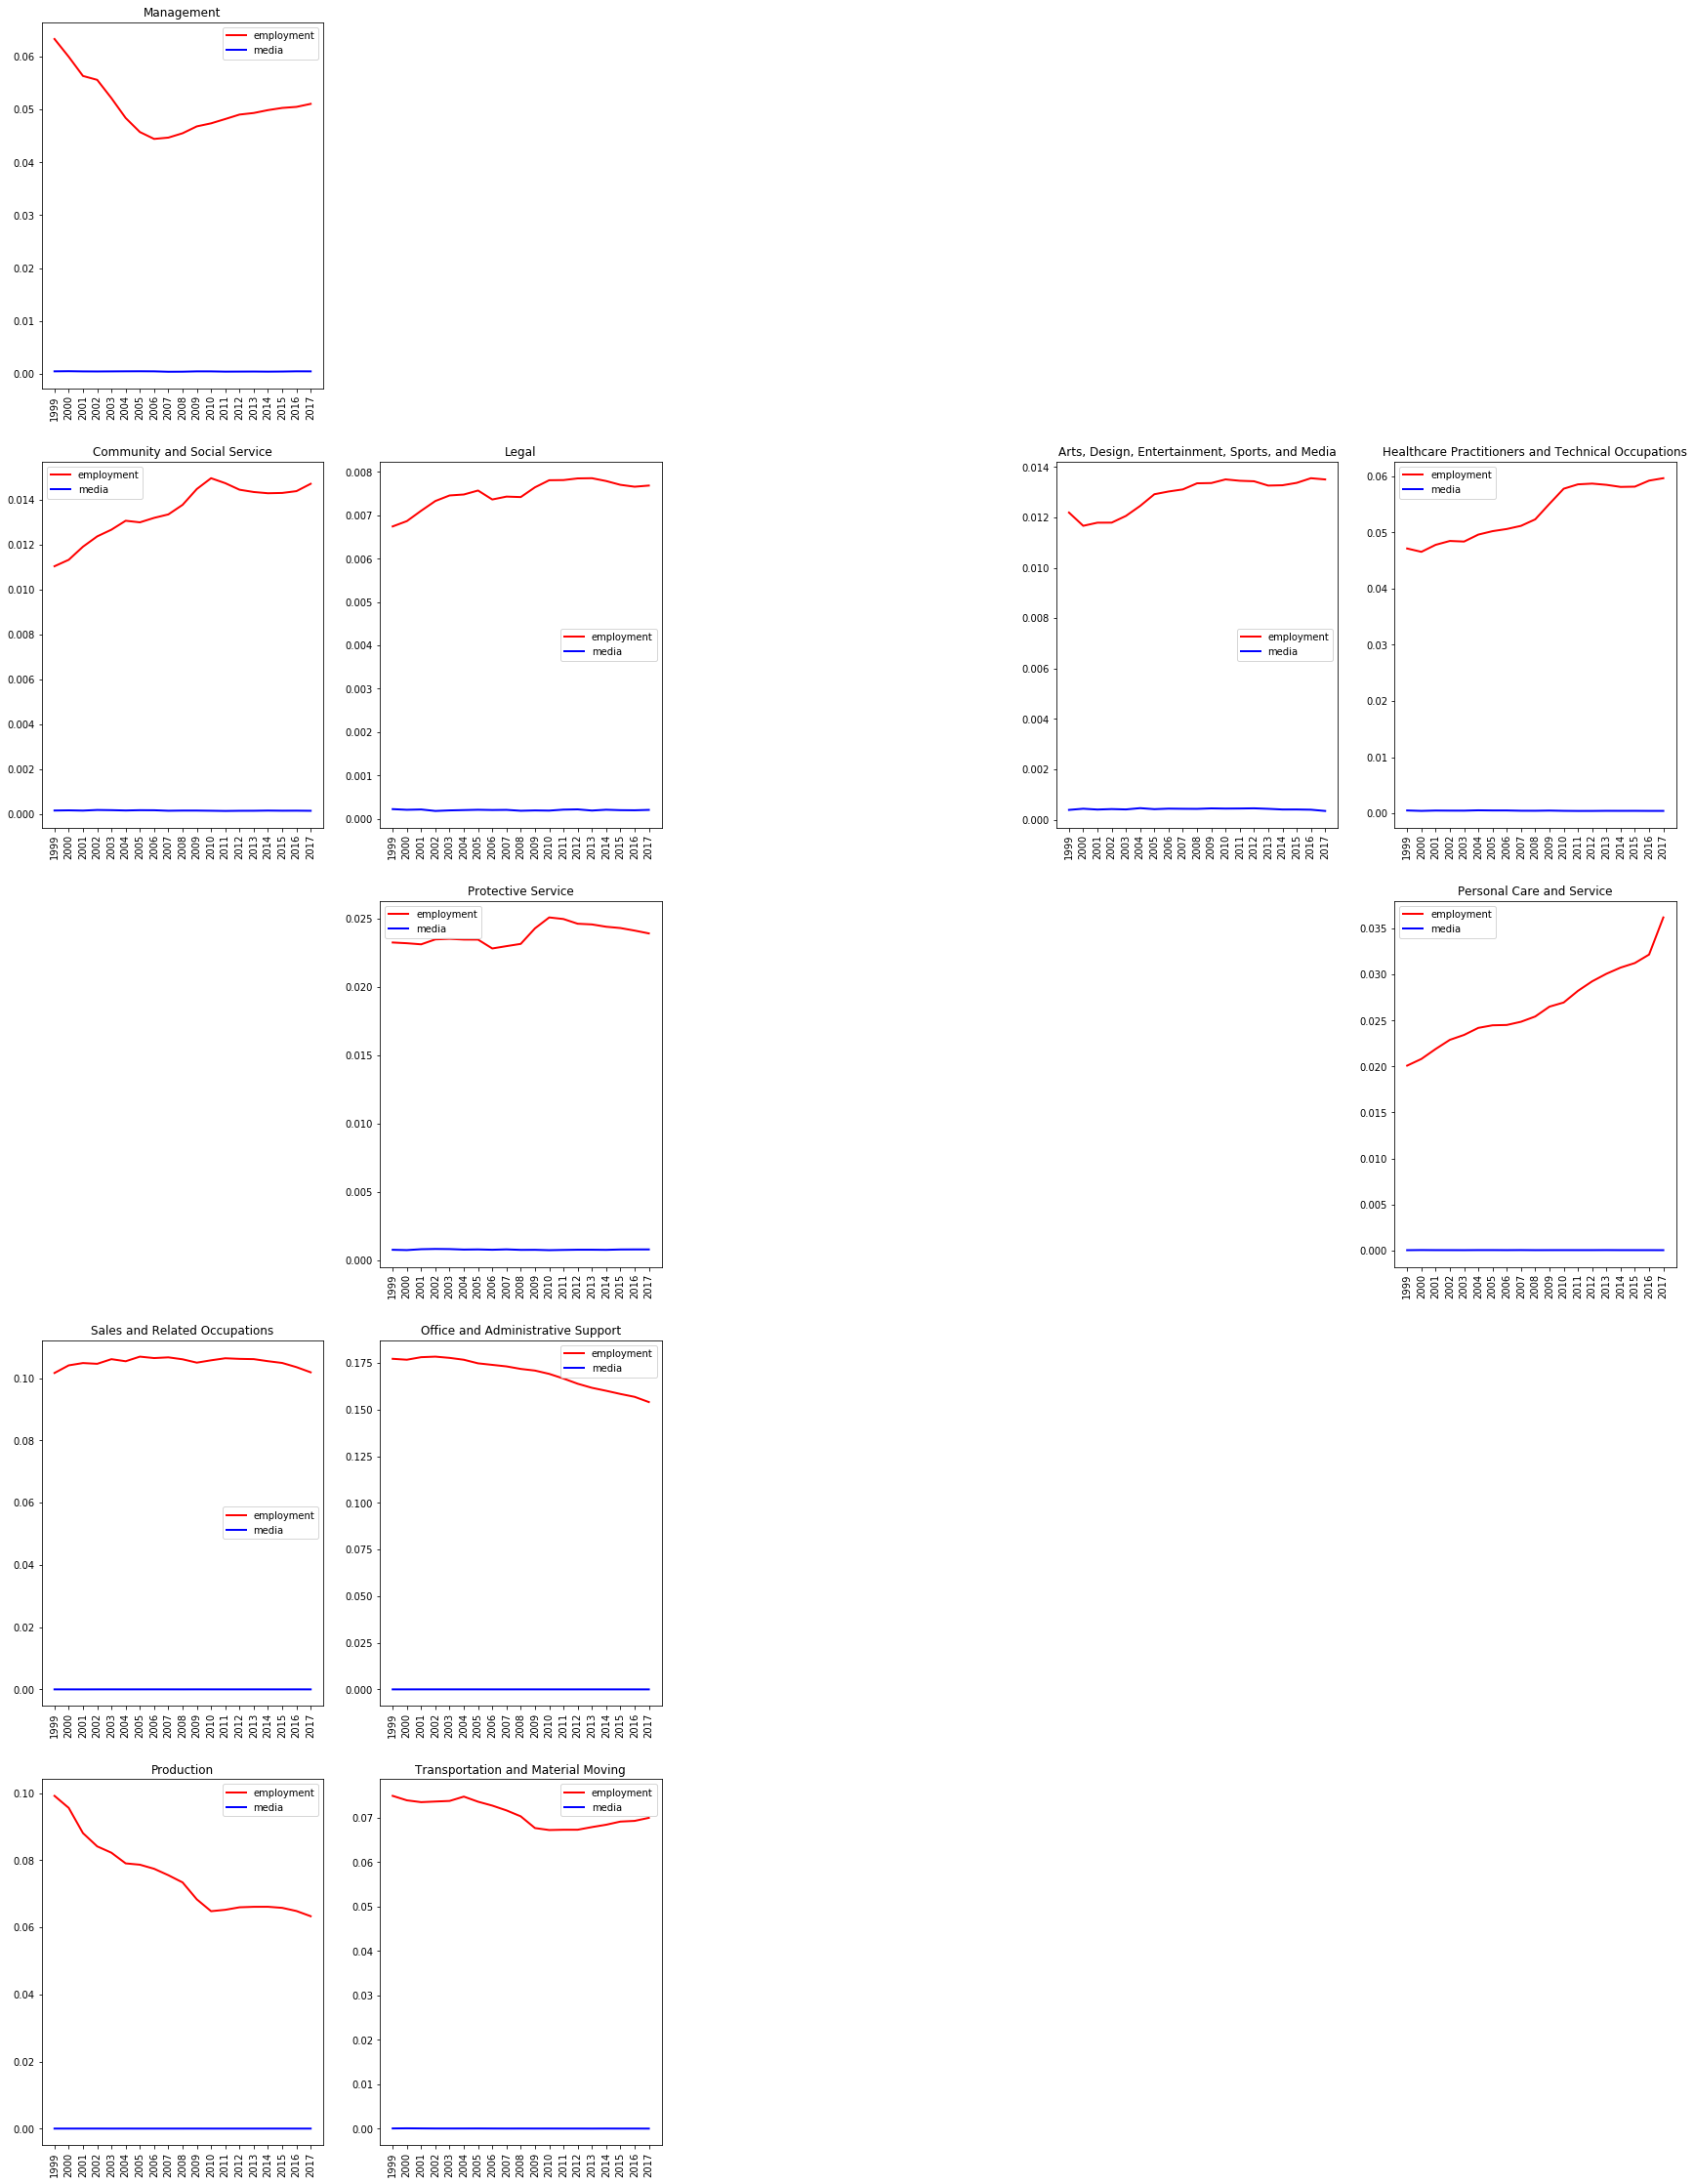

In [53]:
scale = 100


plt.close("all")
plt.figure(figsize=(30,40))

for i in [0,5,6,8,9,11,14,15,16,20,21]:
    plt.subplot(5,5,i+1)
    emp_arr = emp_frac_df.loc[i, years].values
    subtitle_arr = soc_freq_df.loc[i, years].values
    soc_name = soc_freq_df.loc[i, "soc_name"]

    plt.plot(year_axis, emp_arr, label="employment", color="red", lw=2)
    plt.plot(year_axis, subtitle_arr, label="media", color="blue", lw=2)
    plt.xticks(year_axis, years, rotation=90)
    plt.legend()
    plt.title(soc_name)

plt.show()

In [62]:
records = []

for i in trange(22):
    soc_name, soc_arr, emp_arr = soc_freq_df.loc[i, "soc_name"], soc_freq_df.loc[i, years].values.astype(float), emp_frac_df.loc[i, years].values.astype(float)
    
    spearmanr_result = stats.spearmanr(soc_arr, emp_arr)
    spearmanr_correlation, spearmanr_pvalue = spearmanr_result.correlation, spearmanr_result.pvalue
    
    pearsonr_correlation = np.corrcoef(soc_arr, emp_arr)[1][0]
    pearsonr_pvalue = permutation_test(soc_arr, emp_arr, method="approximate", num_rounds=1000, seed=0, func=lambda x, y: np.abs(np.corrcoef(x, y)[1][0]))
    
    records.append([11*i + 2, soc_name, spearmanr_correlation, spearmanr_pvalue, pearsonr_correlation, pearsonr_pvalue])

100%|██████████| 22/22 [00:03<00:00,  7.31it/s]


In [64]:
correlation_df = pd.DataFrame(records, columns = ["soc_code", "soc_name", "spearmanr_correlation", "spearmar_pvalue", "pearsonr_correlation", "pearsonr_pvalue"])

In [67]:
correlation_df

,soc_code,soc_name,spearmanr_correlation,spearmar_pvalue,pearsonr_correlation,pearsonr_pvalue
0,2,Management,0.266667,2.697682e-01,0.396763,0.082
1,13,Business and Financial Operations,0.240351,3.216024e-01,0.318265,0.166
2,24,Computer and Mathematical,0.587719,8.139306e-03,0.615153,0.009
3,35,Architecture and Engineering,0.080702,7.425899e-01,-0.046982,0.935
4,46,"Life, Physical, and Social Science",0.410526,8.083221e-02,0.552193,0.026
5,57,Community and Social Service,-0.773684,1.018640e-04,-0.625199,0.008
6,68,Legal,-0.080702,7.425899e-01,-0.295187,0.212
7,79,Educational Instruction and Library,-0.345614,1.472454e-01,-0.164739,0.389
8,90,"Arts, Design, Entertainment, Sports, and Media",0.063158,7.972829e-01,0.036504,0.942
9,101,Healthcare Practitioners and Technical Occupat...,-0.680702,1.337069e-03,-0.687672,0.004


In [66]:
correlation_df[(correlation_df.spearmar_pvalue < 0.05) | (correlation_df.pearsonr_pvalue < 0.05)]

,soc_code,soc_name,spearmanr_correlation,spearmar_pvalue,pearsonr_correlation,pearsonr_pvalue
2,24,Computer and Mathematical,0.587719,8.139306e-03,0.615153,0.009
4,46,"Life, Physical, and Social Science",0.410526,8.083221e-02,0.552193,0.026
5,57,Community and Social Service,-0.773684,1.018640e-04,-0.625199,0.008
9,101,Healthcare Practitioners and Technical Occupat...,-0.680702,1.337069e-03,-0.687672,0.004
12,134,Food Preparation and Serving Related Occupations,0.673684,1.565450e-03,0.447913,0.056
13,145,Building and Grounds Cleaning and Maintenance,0.712281,6.226088e-04,0.804385,0.000
16,178,Office and Administrative Support,0.957895,1.213531e-10,0.894957,0.000
20,222,Production,0.535088,1.823910e-02,0.434977,0.063
21,233,Transportation and Material Moving,0.721053,4.947295e-04,0.719343,0.003


In [70]:
correlation_df[(correlation_df.spearmar_pvalue < 0.05)]

,soc_code,soc_name,spearmanr_correlation,spearmar_pvalue,pearsonr_correlation,pearsonr_pvalue
2,24,Computer and Mathematical,0.587719,8.139306e-03,0.615153,0.009
5,57,Community and Social Service,-0.773684,1.018640e-04,-0.625199,0.008
9,101,Healthcare Practitioners and Technical Occupat...,-0.680702,1.337069e-03,-0.687672,0.004
12,134,Food Preparation and Serving Related Occupations,0.673684,1.565450e-03,0.447913,0.056
13,145,Building and Grounds Cleaning and Maintenance,0.712281,6.226088e-04,0.804385,0.000
16,178,Office and Administrative Support,0.957895,1.213531e-10,0.894957,0.000
20,222,Production,0.535088,1.823910e-02,0.434977,0.063
21,233,Transportation and Material Moving,0.721053,4.947295e-04,0.719343,0.003


In [71]:
pos_i = [13, 16, 20, 21]
neg_i = [5, 9]

## Media vs Time

In [90]:
emp_arr = emp_df.loc[0, years].values

In [96]:
emp_arr

array([8063410, 7782680, 7212360, 7092460, 6653480, 6200940, 5960560,
       5892900, 6003930, 6152650, 6116380, 6022860, 6183820, 6390430,
       6542950, 6741640, 6936990, 7090790, 7280330])

In [92]:
def moving_average(arr, window):
    brr = arr.copy()
    for i in range(len(arr)):
        j, k = max(0, i - window), min(len(arr), i + window + 1)
        brr[i] = arr[j:k].mean()
    return brr

In [98]:
year_axis = np.arange(1950, 2018)
year_tick_axis = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017])
year_tick_label = year_tick_axis.astype(str)

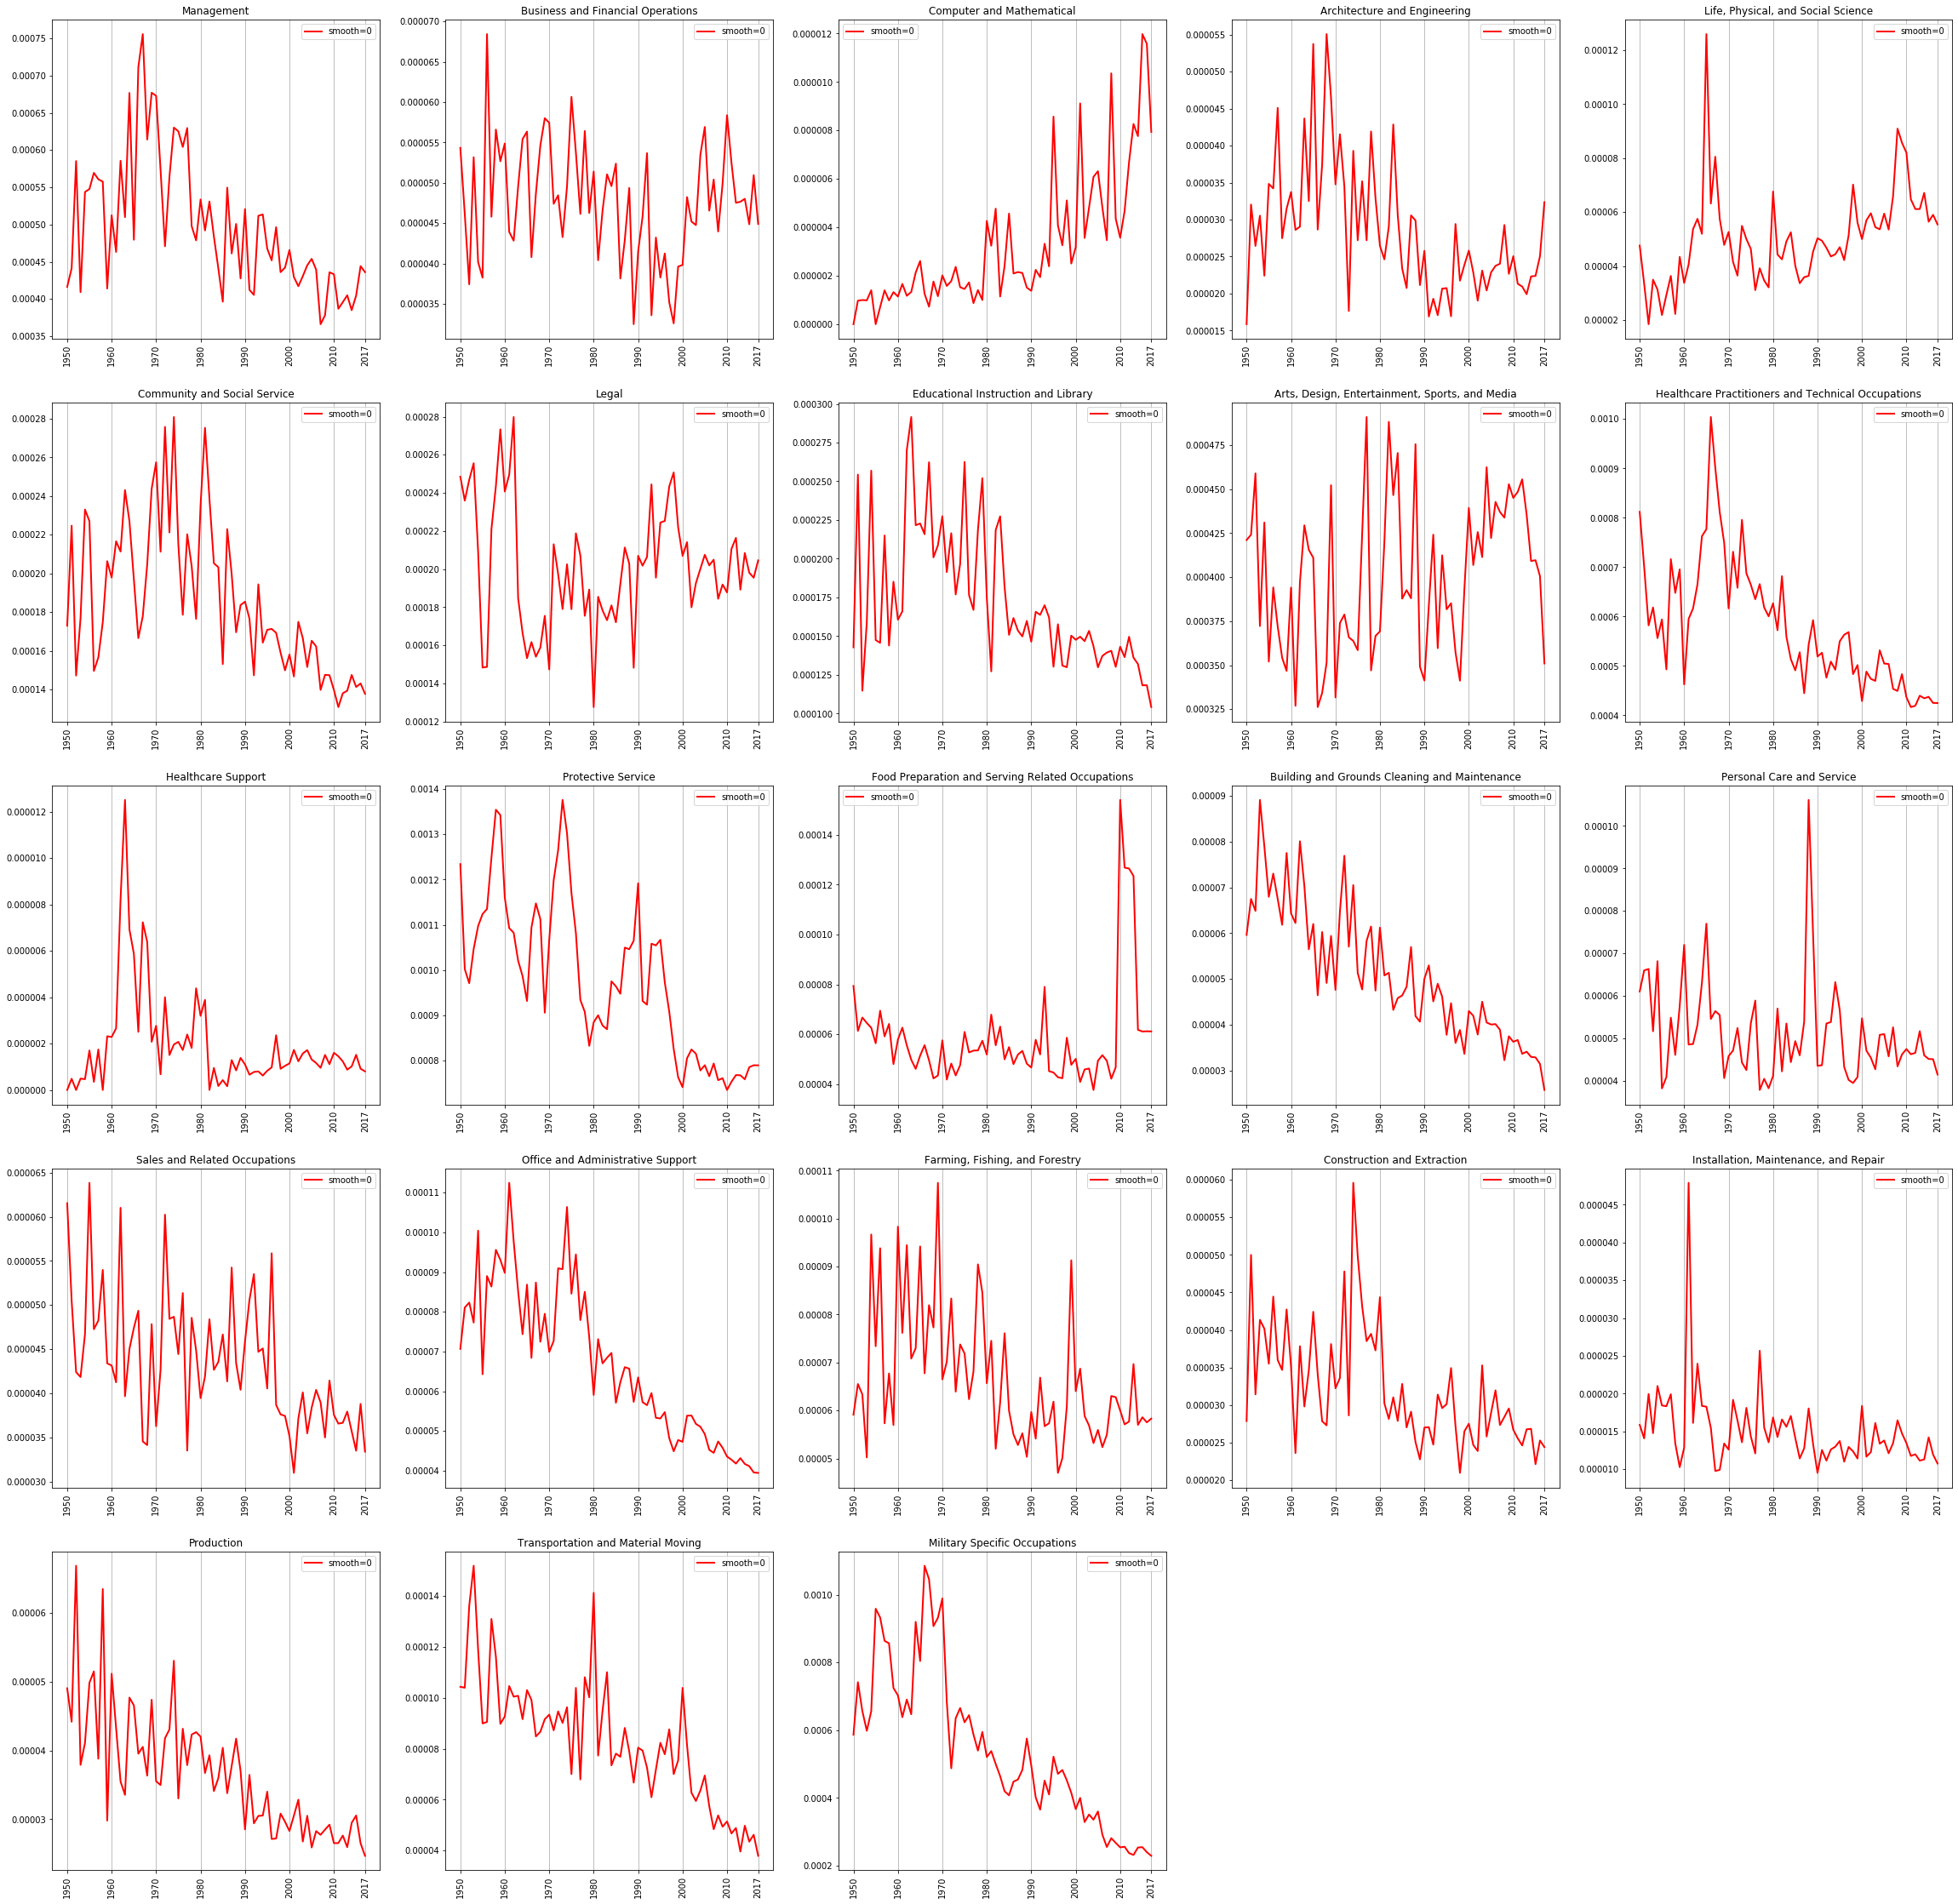

In [125]:
plt.close("all")
plt.figure(figsize=(40,40))

for i in range(23):
    plt.subplot(5,5,i+1)
    subtitle_arr = soc_freq_df.loc[i, year_axis.astype(str)].values
    soc_name = soc_freq_df.loc[i, "soc_name"]

    plt.plot(year_axis, subtitle_arr, label="smooth=0", color="red", lw=2)
#     plt.plot(year_axis, moving_average(subtitle_arr,2), label="smooth=2", color="green", lw=2)
#     plt.plot(year_axis, moving_average(subtitle_arr,5), label="smooth=5", color="brown", lw=2)
    plt.xticks(ticks=year_tick_axis, labels=year_tick_label, rotation=90)
    plt.grid(axis="x")
    plt.legend()
    plt.title(soc_name)

plt.show()

In [113]:
records = []

for i in range(23):
    soc_name = soc_freq_df.loc[i, "soc_name"]
    arr = soc_freq_df.loc[i, year_axis.astype(str)].values
    spearmanr_result = stats.spearmanr(arr, year_axis)
    records.append([11 + i*2, soc_name, spearmanr_result.correlation, spearmanr_result.pvalue])

time_correlation = pd.DataFrame(records, columns=["soc_code","soc_name","spearmanr_correlation","spearmanr_pvalue"])

In [114]:
time_correlation

,soc_code,soc_name,spearmanr_correlation,spearmanr_pvalue
0,11,Management,-0.597244,7.605933e-08
1,13,Business and Financial Operations,-0.153300,2.119945e-01
2,15,Computer and Mathematical,0.853751,2.241890e-20
3,17,Architecture and Engineering,-0.520403,5.394458e-06
4,19,"Life, Physical, and Social Science",0.574684,2.977370e-07
5,21,Community and Social Service,-0.640760,3.974249e-09
6,23,Legal,-0.023438,8.495318e-01
7,25,Educational Instruction and Library,-0.603733,5.036325e-08
8,27,"Arts, Design, Entertainment, Sports, and Media",0.279727,2.087448e-02
9,29,Healthcare Practitioners and Technical Occupat...,-0.778753,5.368140e-15


In [115]:
time_correlation[time_correlation.spearmanr_pvalue < 0.05]

,soc_code,soc_name,spearmanr_correlation,spearmanr_pvalue
0,11,Management,-0.597244,7.605933e-08
2,15,Computer and Mathematical,0.853751,2.241890e-20
3,17,Architecture and Engineering,-0.520403,5.394458e-06
4,19,"Life, Physical, and Social Science",0.574684,2.977370e-07
5,21,Community and Social Service,-0.640760,3.974249e-09
7,25,Educational Instruction and Library,-0.603733,5.036325e-08
8,27,"Arts, Design, Entertainment, Sports, and Media",0.279727,2.087448e-02
9,29,Healthcare Practitioners and Technical Occupat...,-0.778753,5.368140e-15
11,33,Protective Service,-0.779364,4.952238e-15
13,37,Building and Grounds Cleaning and Maintenance,-0.908806,9.433848e-27


## Peaks

In [157]:
def find_peaks(arr, n_peaks, window):
    weights = np.zeros(len(arr))
    
    for i in range(len(arr)):
        j, k = max(0, i - window), min(len(arr), i + window + 1)
        for l in range(j, k):
            if l != i:
                weights[i] += arr[i] - arr[l]
        if k - j > 1:
            weights[i] /= (k - j - 1)
            
    minima_years = np.argsort(weights)[:n_peaks] + 1950
    maxima_years = np.argsort(-weights)[:n_peaks] + 1950
    
    return maxima_years, minima_years, np.abs(np.sort(weights)[:n_peaks]), np.abs(np.sort(-weights)[:n_peaks])

In [131]:
mentions_df = pd.read_csv("data/mentions/mentions.word_filtered.sense_filtered.soc_mapped.merged.csv", index_col=None, dtype={"soc_code":str, "soc_name":str})
imdb_df = pd.read_csv("data/imdb/imdb.ngram.csv", index_col=None)

In [132]:
imdb_df.rename(columns={"imdb_ID":"imdb"}, inplace=True)

In [139]:
mentions_year_df = mentions_df.merge(imdb_df[["imdb","year","imdb_title"]], on="imdb")

In [149]:
mentions_year_df["imdb_url"] = "https://www.imdb.com/title/tt" + mentions_year_df.imdb.astype(str).str.zfill(7)

In [150]:
xdf = mentions_year_df[mentions_year_df.soc_code.str.contains("55") & (mentions_year_df.year >= 1965) & (mentions_year_df.year <= 1970)][["imdb","imdb_title","imdb_url","year"]]

In [154]:
pd.set_option("display.max_info_rows", 100)

In [156]:
xdf.groupby(["imdb","imdb_title","imdb_url"]).agg(len).sort_values(by="year", ascending=False).iloc[:100]

,,,year
imdb,imdb_title,imdb_url,
66026,MASH,https://www.imdb.com/title/tt0066026,296
62038,The Night of the Generals,https://www.imdb.com/title/tt0062038,256
66206,Patton,https://www.imdb.com/title/tt0066206,250
59274,The Hill,https://www.imdb.com/title/tt0059274,188
64733,Battle of the Japan Sea,https://www.imdb.com/title/tt0064733,147
57775,National Geographic Specials,https://www.imdb.com/title/tt0057775,146
62844,Custer of the West,https://www.imdb.com/title/tt0062844,137
60814,Is Paris Burning?,https://www.imdb.com/title/tt0060814,133
59418,Major Dundee,https://www.imdb.com/title/tt0059418,130


In [172]:
for i in range(23):
    maxima_years, minima_years, maxima_weights, minima_weights = find_peaks(soc_freq_df.loc[i, year_axis.astype(str)].values, n_peaks=2, window=5)
    print(11 + 2*i, soc_freq_df.loc[i, "soc_name"])
    
    for year, weight in zip(maxima_years, maxima_weights):
        print(f"\tmaxima: {year} ({weight:.2e})")
    for year, weight in zip(minima_years, minima_weights):
        print(f"\tminima: {year} ({weight:.2e})")
    print()

11 Management
	maxima: 1967 (1.64e-04)
	maxima: 1966 (1.39e-04)
	minima: 1972 (1.59e-04)
	minima: 1959 (1.10e-04)

13 Business and Financial Operations
	maxima: 1956 (1.27e-05)
	maxima: 1992 (1.25e-05)
	minima: 1955 (2.15e-05)
	minima: 1989 (1.33e-05)

15 Computer and Mathematical
	maxima: 1995 (3.30e-06)
	maxima: 2008 (2.61e-06)
	minima: 2010 (5.63e-06)
	minima: 2011 (5.05e-06)

17 Architecture and Engineering
	maxima: 1968 (2.07e-05)
	maxima: 1965 (1.34e-05)
	minima: 1973 (1.80e-05)
	minima: 1950 (1.67e-05)

19 Life, Physical, and Social Science
	maxima: 1965 (1.60e-05)
	maxima: 2008 (1.51e-05)
	minima: 1958 (7.20e-05)
	minima: 1952 (2.68e-05)

21 Community and Social Service
	maxima: 1981 (5.88e-05)
	maxima: 1974 (5.29e-05)
	minima: 1985 (7.16e-05)
	minima: 1976 (6.05e-05)

23 Legal
	maxima: 1962 (8.40e-05)
	maxima: 1959 (8.37e-05)
	minima: 1955 (7.50e-05)
	minima: 1956 (6.41e-05)

25 Educational Instruction and Library
	maxima: 1951 (7.40e-05)
	maxima: 1954 (6.56e-05)
	minima: 1952

In [173]:
xdf = mentions_year_df[mentions_year_df.soc_code.str.contains("39") & (mentions_year_df.year == 1988)][["imdb","imdb_title","imdb_url","year"]]
xdf.groupby(["imdb","imdb_title","imdb_url"]).agg(len).sort_values(by="year", ascending=False).iloc[:100]

,,,year
imdb,imdb_title,imdb_url,
769026,Dr. Von Goosewing's Invisible Ray,https://www.imdb.com/title/tt0769026,33
769030,Restoration Comedy,https://www.imdb.com/title/tt0769030,33
769033,Vampire Vacation,https://www.imdb.com/title/tt0769033,32
769031,The Ghost of McCastle McDuckula,https://www.imdb.com/title/tt0769031,31
769027,Igor's Busy Day,https://www.imdb.com/title/tt0769027,31
769888,Hardluck Hotel,https://www.imdb.com/title/tt0769888,30
769024,Castle Duckula: Open to the Public,https://www.imdb.com/title/tt0769024,30
769028,The Mutinous Penguins,https://www.imdb.com/title/tt0769028,28
769023,Autoduck,https://www.imdb.com/title/tt0769023,27
